# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
#data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

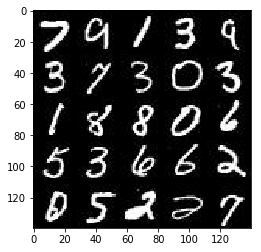

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

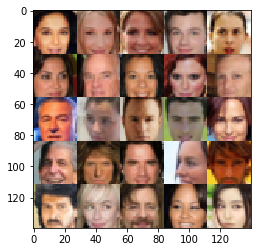

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    inputs_real = tf.placeholder(tf.float32, (None,image_width, image_height, image_channels), name='input_real')
    inputs_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate=tf.placeholder(tf.float32,name="learning_rate")

    return inputs_real, inputs_z, learning_rate
   

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the generator, tensor logits of the generator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha=0.01
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        image1 = tf.layers.conv2d(images, 56, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha * image1, image1)
        
        
        image2 = tf.layers.conv2d(relu1, 112, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(image2, training=True)
        relu2 = tf.maximum(alpha * bn2, bn2)
        
        
        image3 = tf.layers.conv2d(relu2, 224, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(image3, training=True)
        relu3 = tf.maximum(alpha * bn3, bn3)
        
        
        # Flatten it
        flat = tf.reshape(relu3, (-1, 4*4*224))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha=0.01
    # TODO: Implement Function
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        image1 = tf.layers.dense(z, 7*7*224)
        # Reshape it to start the convolutional stack
        image1 = tf.reshape(image1, (-1, 7, 7, 224))
        image1 = tf.layers.batch_normalization(image1, training=is_train)
        image1 = tf.maximum(alpha * image1, image1)
       
        
        image2 = tf.layers.conv2d_transpose(image1, 112, 5, strides=2, padding='same')
        image2 = tf.layers.batch_normalization(image2, training=is_train)
        image2 = tf.maximum(alpha * image2, image2)
        
      
        
       
        
        logits = tf.layers.conv2d_transpose(image2, out_channel_dim, 5, strides=2, padding='same')
        
        
        out = tf.tanh(logits)
        
        return out



"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim, is_train=True)
    d_model_real, d_logits_real = discriminator(input_real, reuse=False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    with tf.control_dependencies(update_ops):
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt
    


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    show_every=100
    learning=learning_rate
    image_width=data_shape[1]
    image_height=data_shape[2]
    image_channels=data_shape[3]
    out_channel_dim=data_shape[3]
    input_real,input_z,learning=model_inputs(image_width, image_height, image_channels, z_dim)
    d_loss,g_loss=model_loss(input_real, input_z, out_channel_dim)
    d_opt,g_opt=model_opt(d_loss, g_loss, learning_rate, beta1)
    
    saver = tf.train.Saver()
    sample_z = np.random.uniform(-1, 1, size=(50, z_dim))

    samples, losses = [], []
    steps = 0

    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images , input_z: batch_z, learning:learning_rate})
                _ = sess.run(g_opt, feed_dict={ input_real: batch_images,input_z: batch_z, learning:learning_rate})
                _ = sess.run(g_opt, feed_dict={input_real: batch_images, input_z: batch_z, learning:learning_rate})

                if steps % 10 == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_real: batch_images,input_z: batch_z})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    # Save losses to view after training
                    losses.append((train_loss_d, train_loss_g))

                if steps % show_every == 0:
                    show_generator_output(sess, 16, input_z, out_channel_dim, data_image_mode)
                   
        

        print("Model Trained")
    
    return None
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 4.8743... Generator Loss: 0.0133
Epoch 1/2... Discriminator Loss: 2.8377... Generator Loss: 0.0784
Epoch 1/2... Discriminator Loss: 2.1833... Generator Loss: 0.1561
Epoch 1/2... Discriminator Loss: 2.0527... Generator Loss: 0.1616
Epoch 1/2... Discriminator Loss: 1.6931... Generator Loss: 0.2644
Epoch 1/2... Discriminator Loss: 1.9966... Generator Loss: 0.1689
Epoch 1/2... Discriminator Loss: 1.9339... Generator Loss: 0.1767
Epoch 1/2... Discriminator Loss: 1.7876... Generator Loss: 0.2071
Epoch 1/2... Discriminator Loss: 1.6750... Generator Loss: 0.2358
Epoch 1/2... Discriminator Loss: 1.8419... Generator Loss: 0.1943


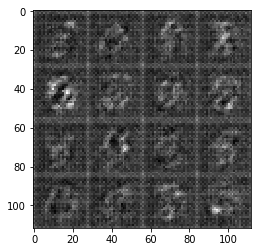

Epoch 1/2... Discriminator Loss: 1.5512... Generator Loss: 0.2645
Epoch 1/2... Discriminator Loss: 1.0126... Generator Loss: 0.5385
Epoch 1/2... Discriminator Loss: 1.1758... Generator Loss: 0.4362
Epoch 1/2... Discriminator Loss: 1.7677... Generator Loss: 0.2167
Epoch 1/2... Discriminator Loss: 1.6878... Generator Loss: 0.2400
Epoch 1/2... Discriminator Loss: 1.6961... Generator Loss: 0.2338
Epoch 1/2... Discriminator Loss: 1.8647... Generator Loss: 0.1963
Epoch 1/2... Discriminator Loss: 1.2565... Generator Loss: 0.4196
Epoch 1/2... Discriminator Loss: 1.5659... Generator Loss: 0.3030
Epoch 1/2... Discriminator Loss: 0.5831... Generator Loss: 1.0072


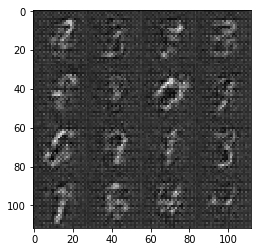

Epoch 1/2... Discriminator Loss: 0.5192... Generator Loss: 2.1115
Epoch 1/2... Discriminator Loss: 1.2604... Generator Loss: 0.4272
Epoch 1/2... Discriminator Loss: 2.2130... Generator Loss: 0.1365
Epoch 1/2... Discriminator Loss: 1.6637... Generator Loss: 0.2525
Epoch 1/2... Discriminator Loss: 1.7945... Generator Loss: 0.2150
Epoch 1/2... Discriminator Loss: 0.4888... Generator Loss: 1.4468
Epoch 1/2... Discriminator Loss: 3.5933... Generator Loss: 0.0417
Epoch 1/2... Discriminator Loss: 1.4268... Generator Loss: 0.3762
Epoch 1/2... Discriminator Loss: 0.9111... Generator Loss: 0.9345
Epoch 1/2... Discriminator Loss: 0.9248... Generator Loss: 0.6688


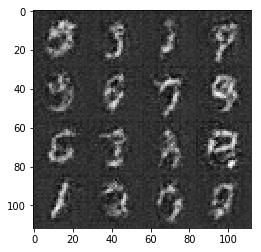

Epoch 1/2... Discriminator Loss: 0.7871... Generator Loss: 0.7991
Epoch 1/2... Discriminator Loss: 1.0495... Generator Loss: 0.5255
Epoch 1/2... Discriminator Loss: 1.2255... Generator Loss: 0.4504
Epoch 1/2... Discriminator Loss: 0.6749... Generator Loss: 0.8585
Epoch 1/2... Discriminator Loss: 1.4837... Generator Loss: 0.3269
Epoch 1/2... Discriminator Loss: 0.3105... Generator Loss: 1.6940
Epoch 1/2... Discriminator Loss: 0.8885... Generator Loss: 0.7830
Epoch 1/2... Discriminator Loss: 1.3453... Generator Loss: 0.3882
Epoch 1/2... Discriminator Loss: 1.8962... Generator Loss: 0.1858
Epoch 1/2... Discriminator Loss: 1.3930... Generator Loss: 0.3480


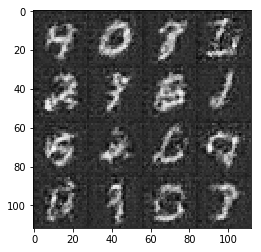

Epoch 1/2... Discriminator Loss: 0.5460... Generator Loss: 1.0738
Epoch 1/2... Discriminator Loss: 1.0948... Generator Loss: 0.5231
Epoch 1/2... Discriminator Loss: 0.9287... Generator Loss: 0.6613
Epoch 1/2... Discriminator Loss: 0.8220... Generator Loss: 0.7040
Epoch 1/2... Discriminator Loss: 0.5872... Generator Loss: 1.0190
Epoch 1/2... Discriminator Loss: 0.3855... Generator Loss: 1.3117
Epoch 1/2... Discriminator Loss: 0.8953... Generator Loss: 0.6810
Epoch 1/2... Discriminator Loss: 0.2465... Generator Loss: 1.9718
Epoch 1/2... Discriminator Loss: 0.2443... Generator Loss: 2.2171
Epoch 1/2... Discriminator Loss: 0.4001... Generator Loss: 1.4615


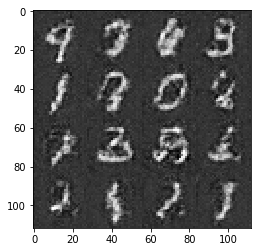

Epoch 1/2... Discriminator Loss: 0.9936... Generator Loss: 0.6091
Epoch 1/2... Discriminator Loss: 2.3228... Generator Loss: 0.1257
Epoch 1/2... Discriminator Loss: 1.3423... Generator Loss: 0.3757
Epoch 1/2... Discriminator Loss: 1.3929... Generator Loss: 0.3321
Epoch 1/2... Discriminator Loss: 0.9906... Generator Loss: 0.5643
Epoch 1/2... Discriminator Loss: 0.3236... Generator Loss: 1.7025
Epoch 1/2... Discriminator Loss: 0.5004... Generator Loss: 2.8579
Epoch 1/2... Discriminator Loss: 1.8908... Generator Loss: 0.2155
Epoch 1/2... Discriminator Loss: 1.6402... Generator Loss: 0.2499
Epoch 1/2... Discriminator Loss: 1.1505... Generator Loss: 0.4853


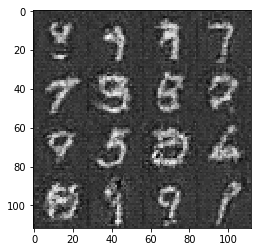

Epoch 1/2... Discriminator Loss: 0.6989... Generator Loss: 0.8974
Epoch 1/2... Discriminator Loss: 0.9073... Generator Loss: 0.6909
Epoch 1/2... Discriminator Loss: 0.4930... Generator Loss: 1.1423
Epoch 1/2... Discriminator Loss: 0.4243... Generator Loss: 1.3241
Epoch 1/2... Discriminator Loss: 0.3657... Generator Loss: 1.4765
Epoch 1/2... Discriminator Loss: 1.2525... Generator Loss: 0.4052
Epoch 1/2... Discriminator Loss: 0.1010... Generator Loss: 2.9831
Epoch 1/2... Discriminator Loss: 0.6500... Generator Loss: 0.9602
Epoch 1/2... Discriminator Loss: 1.2172... Generator Loss: 0.4888
Epoch 1/2... Discriminator Loss: 0.6441... Generator Loss: 0.9506


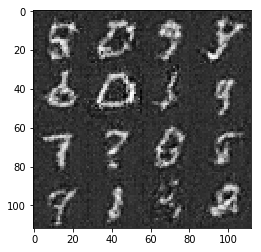

Epoch 1/2... Discriminator Loss: 0.2473... Generator Loss: 1.8569
Epoch 1/2... Discriminator Loss: 6.5443... Generator Loss: 7.0609
Epoch 1/2... Discriminator Loss: 1.1588... Generator Loss: 0.5355
Epoch 1/2... Discriminator Loss: 1.1826... Generator Loss: 0.4976
Epoch 1/2... Discriminator Loss: 0.8046... Generator Loss: 1.1072
Epoch 1/2... Discriminator Loss: 0.9114... Generator Loss: 1.0263
Epoch 1/2... Discriminator Loss: 0.2531... Generator Loss: 2.4018
Epoch 1/2... Discriminator Loss: 0.4004... Generator Loss: 1.3948
Epoch 1/2... Discriminator Loss: 0.5115... Generator Loss: 1.1829
Epoch 1/2... Discriminator Loss: 0.6394... Generator Loss: 0.9380


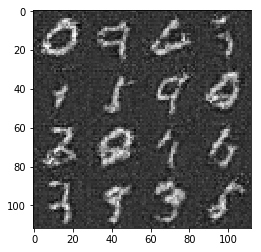

Epoch 1/2... Discriminator Loss: 1.0175... Generator Loss: 0.5443
Epoch 1/2... Discriminator Loss: 0.5344... Generator Loss: 1.0494
Epoch 1/2... Discriminator Loss: 0.1039... Generator Loss: 2.7170
Epoch 1/2... Discriminator Loss: 0.4928... Generator Loss: 1.1416
Epoch 1/2... Discriminator Loss: 0.1538... Generator Loss: 6.9112
Epoch 1/2... Discriminator Loss: 0.7139... Generator Loss: 1.7018
Epoch 1/2... Discriminator Loss: 1.5625... Generator Loss: 0.2755
Epoch 1/2... Discriminator Loss: 0.3119... Generator Loss: 1.9008
Epoch 1/2... Discriminator Loss: 0.2055... Generator Loss: 2.2241
Epoch 1/2... Discriminator Loss: 0.0790... Generator Loss: 3.2759


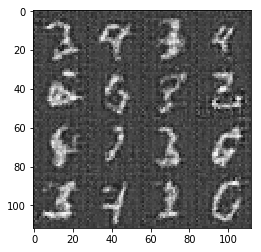

Epoch 1/2... Discriminator Loss: 0.0798... Generator Loss: 4.5865
Epoch 1/2... Discriminator Loss: 0.2678... Generator Loss: 1.7290
Epoch 1/2... Discriminator Loss: 0.1863... Generator Loss: 2.1632
Epoch 2/2... Discriminator Loss: 0.0211... Generator Loss: 5.5040
Epoch 2/2... Discriminator Loss: 0.5812... Generator Loss: 0.9991
Epoch 2/2... Discriminator Loss: 0.3440... Generator Loss: 1.5514
Epoch 2/2... Discriminator Loss: 0.2441... Generator Loss: 1.8057
Epoch 2/2... Discriminator Loss: 0.0425... Generator Loss: 3.6144
Epoch 2/2... Discriminator Loss: 0.0337... Generator Loss: 4.2401
Epoch 2/2... Discriminator Loss: 2.0783... Generator Loss: 0.1728


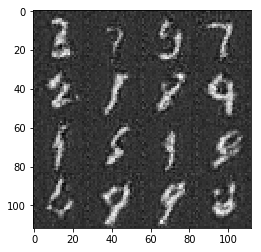

Epoch 2/2... Discriminator Loss: 1.7805... Generator Loss: 0.2583
Epoch 2/2... Discriminator Loss: 0.7330... Generator Loss: 0.9293
Epoch 2/2... Discriminator Loss: 0.7422... Generator Loss: 1.1445
Epoch 2/2... Discriminator Loss: 1.8477... Generator Loss: 0.2174
Epoch 2/2... Discriminator Loss: 2.3710... Generator Loss: 0.1175
Epoch 2/2... Discriminator Loss: 1.0743... Generator Loss: 0.6119
Epoch 2/2... Discriminator Loss: 0.9657... Generator Loss: 0.6234
Epoch 2/2... Discriminator Loss: 0.6350... Generator Loss: 0.9447
Epoch 2/2... Discriminator Loss: 0.3408... Generator Loss: 1.5762
Epoch 2/2... Discriminator Loss: 1.2206... Generator Loss: 0.4299


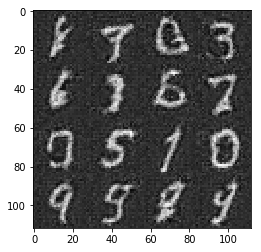

Epoch 2/2... Discriminator Loss: 0.2376... Generator Loss: 1.8554
Epoch 2/2... Discriminator Loss: 0.5498... Generator Loss: 1.1165
Epoch 2/2... Discriminator Loss: 1.1407... Generator Loss: 0.4770
Epoch 2/2... Discriminator Loss: 0.5656... Generator Loss: 1.0619
Epoch 2/2... Discriminator Loss: 2.8961... Generator Loss: 0.0706
Epoch 2/2... Discriminator Loss: 0.6970... Generator Loss: 0.9067
Epoch 2/2... Discriminator Loss: 0.9967... Generator Loss: 0.5948
Epoch 2/2... Discriminator Loss: 0.4921... Generator Loss: 1.1952
Epoch 2/2... Discriminator Loss: 0.9382... Generator Loss: 0.6265
Epoch 2/2... Discriminator Loss: 0.3632... Generator Loss: 1.4629


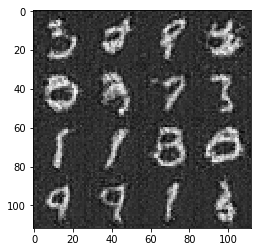

Epoch 2/2... Discriminator Loss: 1.2704... Generator Loss: 0.4193
Epoch 2/2... Discriminator Loss: 0.3068... Generator Loss: 1.6255
Epoch 2/2... Discriminator Loss: 0.2458... Generator Loss: 1.9590
Epoch 2/2... Discriminator Loss: 0.4892... Generator Loss: 1.1826
Epoch 2/2... Discriminator Loss: 0.3290... Generator Loss: 1.5463
Epoch 2/2... Discriminator Loss: 0.7145... Generator Loss: 0.8326
Epoch 2/2... Discriminator Loss: 0.9499... Generator Loss: 0.6566
Epoch 2/2... Discriminator Loss: 1.7059... Generator Loss: 3.4094
Epoch 2/2... Discriminator Loss: 1.2096... Generator Loss: 0.4590
Epoch 2/2... Discriminator Loss: 1.1408... Generator Loss: 0.4589


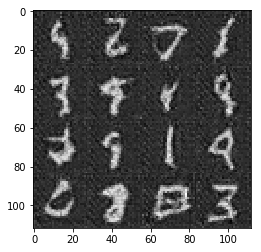

Epoch 2/2... Discriminator Loss: 0.7044... Generator Loss: 0.8948
Epoch 2/2... Discriminator Loss: 0.8541... Generator Loss: 0.7436
Epoch 2/2... Discriminator Loss: 1.2743... Generator Loss: 0.4398
Epoch 2/2... Discriminator Loss: 1.7554... Generator Loss: 0.2558
Epoch 2/2... Discriminator Loss: 0.4362... Generator Loss: 1.2694
Epoch 2/2... Discriminator Loss: 1.2738... Generator Loss: 0.4271
Epoch 2/2... Discriminator Loss: 0.7825... Generator Loss: 0.7773
Epoch 2/2... Discriminator Loss: 0.3262... Generator Loss: 1.5357
Epoch 2/2... Discriminator Loss: 1.5621... Generator Loss: 0.3044
Epoch 2/2... Discriminator Loss: 0.6568... Generator Loss: 0.9956


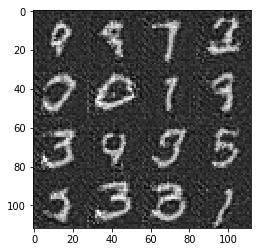

Epoch 2/2... Discriminator Loss: 0.1583... Generator Loss: 2.3226
Epoch 2/2... Discriminator Loss: 0.0319... Generator Loss: 4.8880
Epoch 2/2... Discriminator Loss: 0.1151... Generator Loss: 2.6451
Epoch 2/2... Discriminator Loss: 0.1073... Generator Loss: 2.8618
Epoch 2/2... Discriminator Loss: 0.1236... Generator Loss: 2.6967
Epoch 2/2... Discriminator Loss: 0.4696... Generator Loss: 1.1747
Epoch 2/2... Discriminator Loss: 0.0483... Generator Loss: 3.5753
Epoch 2/2... Discriminator Loss: 1.1124... Generator Loss: 0.5629
Epoch 2/2... Discriminator Loss: 2.2223... Generator Loss: 0.1611
Epoch 2/2... Discriminator Loss: 1.0398... Generator Loss: 0.5590


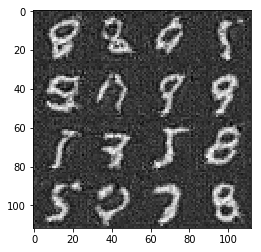

Epoch 2/2... Discriminator Loss: 1.2675... Generator Loss: 0.4178
Epoch 2/2... Discriminator Loss: 1.3054... Generator Loss: 0.3621
Epoch 2/2... Discriminator Loss: 0.6137... Generator Loss: 1.9016
Epoch 2/2... Discriminator Loss: 1.0293... Generator Loss: 0.5643
Epoch 2/2... Discriminator Loss: 1.3807... Generator Loss: 0.3859
Epoch 2/2... Discriminator Loss: 0.6916... Generator Loss: 0.8847
Epoch 2/2... Discriminator Loss: 0.2753... Generator Loss: 1.8245
Epoch 2/2... Discriminator Loss: 4.4494... Generator Loss: 6.8414
Epoch 2/2... Discriminator Loss: 1.3194... Generator Loss: 0.3950
Epoch 2/2... Discriminator Loss: 0.7601... Generator Loss: 1.0452


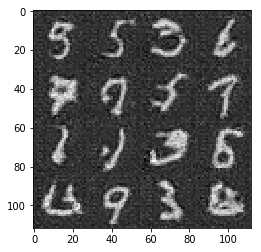

Epoch 2/2... Discriminator Loss: 0.7086... Generator Loss: 1.3523
Epoch 2/2... Discriminator Loss: 1.6806... Generator Loss: 0.2384
Epoch 2/2... Discriminator Loss: 0.6950... Generator Loss: 0.9046
Epoch 2/2... Discriminator Loss: 1.9151... Generator Loss: 0.2262
Epoch 2/2... Discriminator Loss: 1.2867... Generator Loss: 0.4110
Epoch 2/2... Discriminator Loss: 1.1510... Generator Loss: 0.4658
Epoch 2/2... Discriminator Loss: 1.2303... Generator Loss: 0.4458
Epoch 2/2... Discriminator Loss: 0.8029... Generator Loss: 0.8150
Epoch 2/2... Discriminator Loss: 1.8603... Generator Loss: 0.2177
Epoch 2/2... Discriminator Loss: 0.1750... Generator Loss: 2.2774


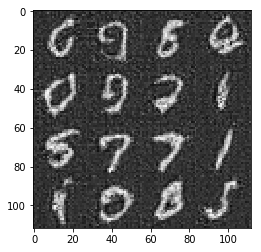

Epoch 2/2... Discriminator Loss: 0.3451... Generator Loss: 1.5910
Epoch 2/2... Discriminator Loss: 0.4042... Generator Loss: 1.3706
Epoch 2/2... Discriminator Loss: 1.1389... Generator Loss: 0.5268
Epoch 2/2... Discriminator Loss: 1.3074... Generator Loss: 0.4389
Epoch 2/2... Discriminator Loss: 0.1908... Generator Loss: 2.1784
Epoch 2/2... Discriminator Loss: 0.8424... Generator Loss: 0.7682
Epoch 2/2... Discriminator Loss: 0.6707... Generator Loss: 0.9306
Epoch 2/2... Discriminator Loss: 0.6269... Generator Loss: 1.0892
Epoch 2/2... Discriminator Loss: 0.1167... Generator Loss: 3.6658
Epoch 2/2... Discriminator Loss: 0.5181... Generator Loss: 1.0918


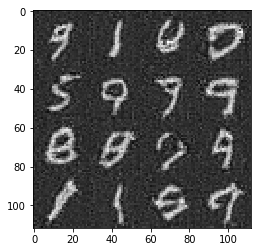

Epoch 2/2... Discriminator Loss: 0.7971... Generator Loss: 0.8156
Epoch 2/2... Discriminator Loss: 0.2642... Generator Loss: 1.6956
Epoch 2/2... Discriminator Loss: 0.8479... Generator Loss: 0.8043
Epoch 2/2... Discriminator Loss: 0.0620... Generator Loss: 3.3314
Epoch 2/2... Discriminator Loss: 0.0243... Generator Loss: 4.4974
Epoch 2/2... Discriminator Loss: 0.2688... Generator Loss: 1.8409
Epoch 2/2... Discriminator Loss: 1.4268... Generator Loss: 0.4153
Model Trained


In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0004
beta1 = 0.2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 2.4112... Generator Loss: 0.1696
Epoch 1/1... Discriminator Loss: 1.4734... Generator Loss: 0.3668
Epoch 1/1... Discriminator Loss: 1.0771... Generator Loss: 0.8148
Epoch 1/1... Discriminator Loss: 1.7990... Generator Loss: 0.3819
Epoch 1/1... Discriminator Loss: 1.3079... Generator Loss: 1.5759
Epoch 1/1... Discriminator Loss: 1.0923... Generator Loss: 0.9546
Epoch 1/1... Discriminator Loss: 1.5658... Generator Loss: 0.5004
Epoch 1/1... Discriminator Loss: 1.2172... Generator Loss: 0.9540
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 1.5969
Epoch 1/1... Discriminator Loss: 1.1540... Generator Loss: 0.7740


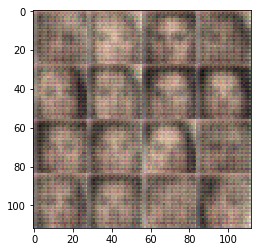

Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 3.3693
Epoch 1/1... Discriminator Loss: 1.2237... Generator Loss: 0.7041
Epoch 1/1... Discriminator Loss: 1.2575... Generator Loss: 0.5378
Epoch 1/1... Discriminator Loss: 1.7105... Generator Loss: 0.3374
Epoch 1/1... Discriminator Loss: 0.9396... Generator Loss: 2.4562
Epoch 1/1... Discriminator Loss: 1.2029... Generator Loss: 0.7589
Epoch 1/1... Discriminator Loss: 1.2655... Generator Loss: 0.5887
Epoch 1/1... Discriminator Loss: 1.5599... Generator Loss: 0.3974
Epoch 1/1... Discriminator Loss: 0.9563... Generator Loss: 2.8783
Epoch 1/1... Discriminator Loss: 0.9747... Generator Loss: 2.9123


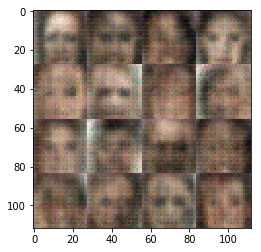

Epoch 1/1... Discriminator Loss: 1.4959... Generator Loss: 0.4274
Epoch 1/1... Discriminator Loss: 1.1893... Generator Loss: 1.0097
Epoch 1/1... Discriminator Loss: 1.0051... Generator Loss: 0.9204
Epoch 1/1... Discriminator Loss: 1.3224... Generator Loss: 0.4381
Epoch 1/1... Discriminator Loss: 1.5683... Generator Loss: 0.3775
Epoch 1/1... Discriminator Loss: 1.1557... Generator Loss: 0.5108
Epoch 1/1... Discriminator Loss: 1.5799... Generator Loss: 0.3214
Epoch 1/1... Discriminator Loss: 1.3678... Generator Loss: 0.5349
Epoch 1/1... Discriminator Loss: 0.9651... Generator Loss: 3.3457
Epoch 1/1... Discriminator Loss: 0.6600... Generator Loss: 2.7270


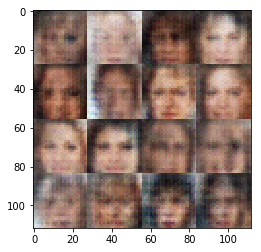

Epoch 1/1... Discriminator Loss: 1.4384... Generator Loss: 0.4242
Epoch 1/1... Discriminator Loss: 2.4071... Generator Loss: 0.1372
Epoch 1/1... Discriminator Loss: 0.8979... Generator Loss: 4.1727
Epoch 1/1... Discriminator Loss: 1.0260... Generator Loss: 0.6701
Epoch 1/1... Discriminator Loss: 0.5336... Generator Loss: 3.0352
Epoch 1/1... Discriminator Loss: 1.0012... Generator Loss: 0.7327
Epoch 1/1... Discriminator Loss: 1.2188... Generator Loss: 2.3066
Epoch 1/1... Discriminator Loss: 0.6978... Generator Loss: 0.8819
Epoch 1/1... Discriminator Loss: 1.8676... Generator Loss: 0.2035


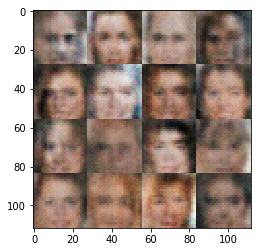

Epoch 1/1... Discriminator Loss: 1.5653... Generator Loss: 0.2909
Epoch 1/1... Discriminator Loss: 1.1735... Generator Loss: 0.5717
Epoch 1/1... Discriminator Loss: 0.8802... Generator Loss: 0.6729
Epoch 1/1... Discriminator Loss: 0.3172... Generator Loss: 2.7637
Epoch 1/1... Discriminator Loss: 1.4077... Generator Loss: 0.8005
Epoch 1/1... Discriminator Loss: 1.9993... Generator Loss: 0.1910
Epoch 1/1... Discriminator Loss: 0.7872... Generator Loss: 2.2565
Epoch 1/1... Discriminator Loss: 1.4360... Generator Loss: 1.4321
Epoch 1/1... Discriminator Loss: 0.6804... Generator Loss: 1.2964
Epoch 1/1... Discriminator Loss: 2.1698... Generator Loss: 0.1523


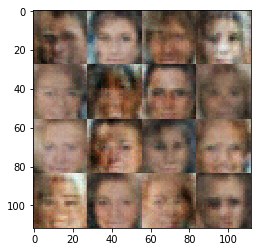

Epoch 1/1... Discriminator Loss: 0.5843... Generator Loss: 4.1401
Epoch 1/1... Discriminator Loss: 1.3029... Generator Loss: 1.0598
Epoch 1/1... Discriminator Loss: 0.7062... Generator Loss: 3.1766
Epoch 1/1... Discriminator Loss: 1.8922... Generator Loss: 0.2105
Epoch 1/1... Discriminator Loss: 1.1887... Generator Loss: 0.5584
Epoch 1/1... Discriminator Loss: 0.2872... Generator Loss: 3.2262
Epoch 1/1... Discriminator Loss: 0.9612... Generator Loss: 0.9636
Epoch 1/1... Discriminator Loss: 0.6433... Generator Loss: 3.9744
Epoch 1/1... Discriminator Loss: 1.5043... Generator Loss: 0.4068
Epoch 1/1... Discriminator Loss: 1.6731... Generator Loss: 0.2748


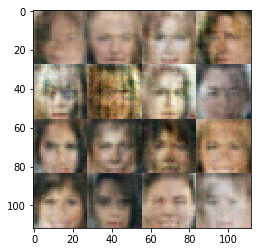

Epoch 1/1... Discriminator Loss: 0.7254... Generator Loss: 2.4589
Epoch 1/1... Discriminator Loss: 0.2435... Generator Loss: 4.9996
Epoch 1/1... Discriminator Loss: 0.0754... Generator Loss: 4.8149
Epoch 1/1... Discriminator Loss: 1.4004... Generator Loss: 0.3429
Epoch 1/1... Discriminator Loss: 0.5204... Generator Loss: 1.2990
Epoch 1/1... Discriminator Loss: 0.9533... Generator Loss: 0.6471
Epoch 1/1... Discriminator Loss: 0.6693... Generator Loss: 0.9407
Epoch 1/1... Discriminator Loss: 3.1186... Generator Loss: 0.0585
Epoch 1/1... Discriminator Loss: 0.3290... Generator Loss: 2.8170
Epoch 1/1... Discriminator Loss: 0.6434... Generator Loss: 0.9063


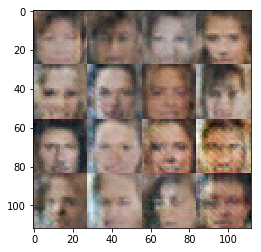

Epoch 1/1... Discriminator Loss: 0.5388... Generator Loss: 1.1049
Epoch 1/1... Discriminator Loss: 2.2279... Generator Loss: 3.1520
Epoch 1/1... Discriminator Loss: 0.1927... Generator Loss: 2.5807
Epoch 1/1... Discriminator Loss: 0.2016... Generator Loss: 2.0693
Epoch 1/1... Discriminator Loss: 0.2121... Generator Loss: 7.1340
Epoch 1/1... Discriminator Loss: 0.7961... Generator Loss: 0.7781
Epoch 1/1... Discriminator Loss: 0.6791... Generator Loss: 0.9231
Epoch 1/1... Discriminator Loss: 0.1065... Generator Loss: 7.8041
Epoch 1/1... Discriminator Loss: 1.6821... Generator Loss: 4.6582
Epoch 1/1... Discriminator Loss: 0.4257... Generator Loss: 5.8335


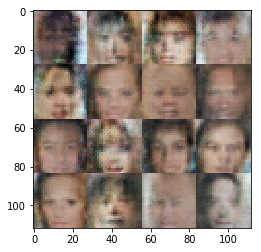

Epoch 1/1... Discriminator Loss: 0.1815... Generator Loss: 2.1616
Epoch 1/1... Discriminator Loss: 0.1038... Generator Loss: 6.2504
Epoch 1/1... Discriminator Loss: 1.2138... Generator Loss: 0.4591
Epoch 1/1... Discriminator Loss: 0.4083... Generator Loss: 3.9537
Epoch 1/1... Discriminator Loss: 1.8480... Generator Loss: 0.2062
Epoch 1/1... Discriminator Loss: 0.7731... Generator Loss: 1.6962
Epoch 1/1... Discriminator Loss: 0.4174... Generator Loss: 3.5982
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 0.6917
Epoch 1/1... Discriminator Loss: 0.2201... Generator Loss: 2.1754
Epoch 1/1... Discriminator Loss: 0.1959... Generator Loss: 2.0108


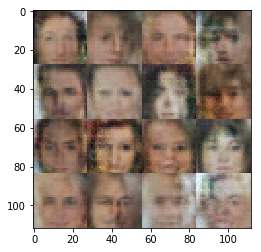

Epoch 1/1... Discriminator Loss: 0.7518... Generator Loss: 2.5859
Epoch 1/1... Discriminator Loss: 0.4407... Generator Loss: 1.5781
Epoch 1/1... Discriminator Loss: 0.3187... Generator Loss: 8.9751
Epoch 1/1... Discriminator Loss: 0.6512... Generator Loss: 9.1116
Epoch 1/1... Discriminator Loss: 3.2226... Generator Loss: 0.0473
Epoch 1/1... Discriminator Loss: 0.5485... Generator Loss: 1.2351
Epoch 1/1... Discriminator Loss: 0.2243... Generator Loss: 7.6514
Epoch 1/1... Discriminator Loss: 0.7922... Generator Loss: 0.9724
Epoch 1/1... Discriminator Loss: 0.3736... Generator Loss: 2.6410
Epoch 1/1... Discriminator Loss: 2.0546... Generator Loss: 0.1846


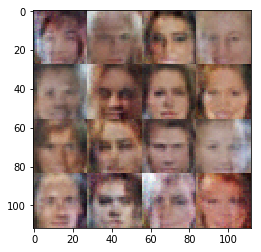

Epoch 1/1... Discriminator Loss: 0.4511... Generator Loss: 5.8029
Epoch 1/1... Discriminator Loss: 0.1249... Generator Loss: 6.4880
Epoch 1/1... Discriminator Loss: 0.1969... Generator Loss: 3.2109
Epoch 1/1... Discriminator Loss: 0.6975... Generator Loss: 0.8100
Epoch 1/1... Discriminator Loss: 0.1340... Generator Loss: 6.6820
Epoch 1/1... Discriminator Loss: 0.4549... Generator Loss: 1.1562
Epoch 1/1... Discriminator Loss: 1.8280... Generator Loss: 0.2581
Epoch 1/1... Discriminator Loss: 1.6520... Generator Loss: 0.4882
Epoch 1/1... Discriminator Loss: 2.0767... Generator Loss: 0.2501
Epoch 1/1... Discriminator Loss: 1.4770... Generator Loss: 0.4861


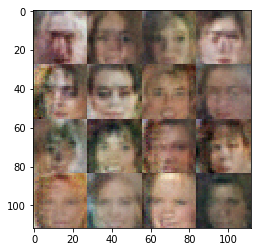

Epoch 1/1... Discriminator Loss: 0.8406... Generator Loss: 1.0750
Epoch 1/1... Discriminator Loss: 0.3753... Generator Loss: 3.5954
Epoch 1/1... Discriminator Loss: 1.7110... Generator Loss: 0.2628
Epoch 1/1... Discriminator Loss: 1.3655... Generator Loss: 0.3936
Epoch 1/1... Discriminator Loss: 0.3442... Generator Loss: 1.9331
Epoch 1/1... Discriminator Loss: 1.3228... Generator Loss: 0.4844
Epoch 1/1... Discriminator Loss: 1.5240... Generator Loss: 0.3160
Epoch 1/1... Discriminator Loss: 0.2084... Generator Loss: 2.8897
Epoch 1/1... Discriminator Loss: 2.4090... Generator Loss: 0.1104
Epoch 1/1... Discriminator Loss: 1.5482... Generator Loss: 0.4969


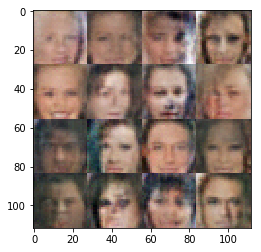

Epoch 1/1... Discriminator Loss: 1.6553... Generator Loss: 0.3369
Epoch 1/1... Discriminator Loss: 0.8836... Generator Loss: 0.7765
Epoch 1/1... Discriminator Loss: 1.0258... Generator Loss: 0.6323
Epoch 1/1... Discriminator Loss: 1.4857... Generator Loss: 0.3507
Epoch 1/1... Discriminator Loss: 0.1603... Generator Loss: 2.8134
Epoch 1/1... Discriminator Loss: 0.3864... Generator Loss: 5.6275
Epoch 1/1... Discriminator Loss: 0.2581... Generator Loss: 5.6856
Epoch 1/1... Discriminator Loss: 0.8070... Generator Loss: 1.3683
Epoch 1/1... Discriminator Loss: 0.2643... Generator Loss: 5.6936
Epoch 1/1... Discriminator Loss: 0.6751... Generator Loss: 0.8598


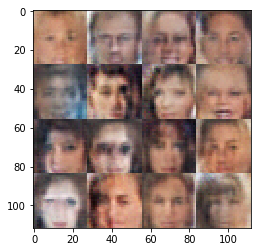

Epoch 1/1... Discriminator Loss: 0.7412... Generator Loss: 0.8086
Epoch 1/1... Discriminator Loss: 0.9208... Generator Loss: 5.6900
Epoch 1/1... Discriminator Loss: 0.0986... Generator Loss: 5.3411
Epoch 1/1... Discriminator Loss: 1.6628... Generator Loss: 0.4123
Epoch 1/1... Discriminator Loss: 1.2327... Generator Loss: 0.5830
Epoch 1/1... Discriminator Loss: 2.2044... Generator Loss: 0.1572
Epoch 1/1... Discriminator Loss: 0.4817... Generator Loss: 1.5531
Epoch 1/1... Discriminator Loss: 1.1239... Generator Loss: 0.6158
Epoch 1/1... Discriminator Loss: 0.8599... Generator Loss: 0.8469
Epoch 1/1... Discriminator Loss: 0.1692... Generator Loss: 7.7120


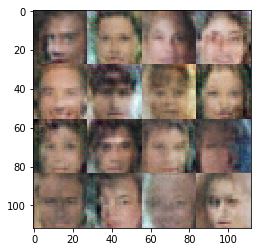

Epoch 1/1... Discriminator Loss: 2.8318... Generator Loss: 0.0736
Epoch 1/1... Discriminator Loss: 0.8753... Generator Loss: 0.9462
Epoch 1/1... Discriminator Loss: 1.5907... Generator Loss: 0.3730
Epoch 1/1... Discriminator Loss: 0.0604... Generator Loss: 5.0934
Epoch 1/1... Discriminator Loss: 0.0851... Generator Loss: 6.6511
Epoch 1/1... Discriminator Loss: 1.1871... Generator Loss: 0.4819
Epoch 1/1... Discriminator Loss: 0.2132... Generator Loss: 2.6926
Epoch 1/1... Discriminator Loss: 0.5113... Generator Loss: 6.7121
Epoch 1/1... Discriminator Loss: 0.1269... Generator Loss: 6.6562
Epoch 1/1... Discriminator Loss: 0.4997... Generator Loss: 1.1698


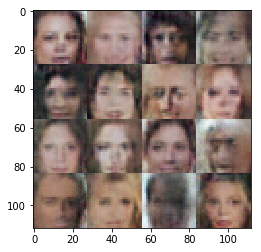

Epoch 1/1... Discriminator Loss: 0.7347... Generator Loss: 0.8352
Epoch 1/1... Discriminator Loss: 0.4390... Generator Loss: 1.3944
Epoch 1/1... Discriminator Loss: 0.0845... Generator Loss: 12.3093
Epoch 1/1... Discriminator Loss: 1.8721... Generator Loss: 0.7130
Epoch 1/1... Discriminator Loss: 1.4117... Generator Loss: 0.4092
Epoch 1/1... Discriminator Loss: 1.8314... Generator Loss: 0.2944
Epoch 1/1... Discriminator Loss: 1.4317... Generator Loss: 0.3984
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.0095
Epoch 1/1... Discriminator Loss: 1.3602... Generator Loss: 0.5236
Epoch 1/1... Discriminator Loss: 0.3704... Generator Loss: 2.2314


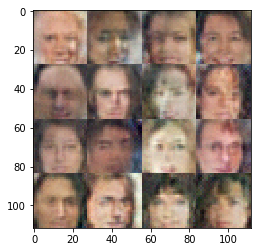

Epoch 1/1... Discriminator Loss: 1.4163... Generator Loss: 0.4268
Epoch 1/1... Discriminator Loss: 0.7609... Generator Loss: 0.9371
Epoch 1/1... Discriminator Loss: 0.4499... Generator Loss: 3.4045
Epoch 1/1... Discriminator Loss: 1.5125... Generator Loss: 0.3055
Epoch 1/1... Discriminator Loss: 0.7685... Generator Loss: 0.7645
Epoch 1/1... Discriminator Loss: 1.8016... Generator Loss: 0.2213
Epoch 1/1... Discriminator Loss: 0.2559... Generator Loss: 7.0300
Epoch 1/1... Discriminator Loss: 0.1027... Generator Loss: 4.7824
Epoch 1/1... Discriminator Loss: 0.4008... Generator Loss: 1.5583
Epoch 1/1... Discriminator Loss: 3.4287... Generator Loss: 0.0411


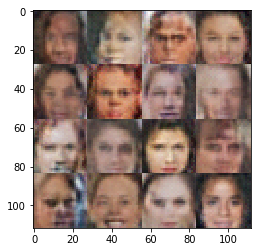

Epoch 1/1... Discriminator Loss: 1.2982... Generator Loss: 0.4809
Epoch 1/1... Discriminator Loss: 1.4931... Generator Loss: 0.4074
Epoch 1/1... Discriminator Loss: 1.2483... Generator Loss: 0.5188
Epoch 1/1... Discriminator Loss: 1.4194... Generator Loss: 0.3868
Epoch 1/1... Discriminator Loss: 1.5721... Generator Loss: 0.2899
Epoch 1/1... Discriminator Loss: 1.4565... Generator Loss: 0.3855
Epoch 1/1... Discriminator Loss: 0.6376... Generator Loss: 1.2708
Epoch 1/1... Discriminator Loss: 0.3157... Generator Loss: 1.5635
Epoch 1/1... Discriminator Loss: 2.4680... Generator Loss: 0.1092
Epoch 1/1... Discriminator Loss: 1.6657... Generator Loss: 0.2987


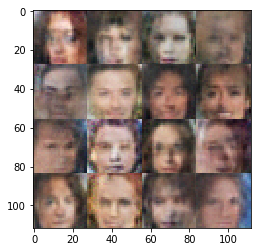

Epoch 1/1... Discriminator Loss: 1.2489... Generator Loss: 0.6188
Epoch 1/1... Discriminator Loss: 0.2207... Generator Loss: 7.5231
Epoch 1/1... Discriminator Loss: 0.1857... Generator Loss: 2.5087
Epoch 1/1... Discriminator Loss: 1.6352... Generator Loss: 0.2981
Epoch 1/1... Discriminator Loss: 1.3543... Generator Loss: 0.4217
Epoch 1/1... Discriminator Loss: 1.8627... Generator Loss: 0.2356
Epoch 1/1... Discriminator Loss: 0.2051... Generator Loss: 4.4551
Epoch 1/1... Discriminator Loss: 0.5151... Generator Loss: 1.4718
Epoch 1/1... Discriminator Loss: 2.0229... Generator Loss: 0.1938
Epoch 1/1... Discriminator Loss: 1.3633... Generator Loss: 0.7121


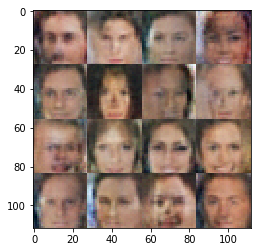

Epoch 1/1... Discriminator Loss: 1.0705... Generator Loss: 0.6794
Epoch 1/1... Discriminator Loss: 1.5956... Generator Loss: 0.3072
Epoch 1/1... Discriminator Loss: 1.0038... Generator Loss: 0.6668
Epoch 1/1... Discriminator Loss: 0.5052... Generator Loss: 1.1890
Epoch 1/1... Discriminator Loss: 0.3987... Generator Loss: 1.7785
Epoch 1/1... Discriminator Loss: 0.0838... Generator Loss: 3.4845
Epoch 1/1... Discriminator Loss: 1.4362... Generator Loss: 0.5562
Epoch 1/1... Discriminator Loss: 1.8649... Generator Loss: 0.2702
Epoch 1/1... Discriminator Loss: 1.0588... Generator Loss: 0.6599
Epoch 1/1... Discriminator Loss: 1.3232... Generator Loss: 0.8510


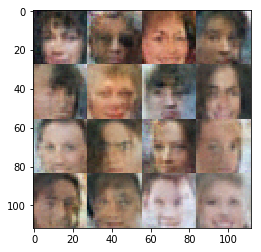

Epoch 1/1... Discriminator Loss: 0.2607... Generator Loss: 5.3091
Epoch 1/1... Discriminator Loss: 0.1204... Generator Loss: 4.1695
Epoch 1/1... Discriminator Loss: 0.3905... Generator Loss: 6.7195
Epoch 1/1... Discriminator Loss: 1.0572... Generator Loss: 0.7245
Epoch 1/1... Discriminator Loss: 1.4966... Generator Loss: 0.3702
Epoch 1/1... Discriminator Loss: 2.0553... Generator Loss: 0.1746
Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 6.4421
Epoch 1/1... Discriminator Loss: 0.2959... Generator Loss: 1.8245
Epoch 1/1... Discriminator Loss: 2.0370... Generator Loss: 0.1930
Epoch 1/1... Discriminator Loss: 0.4178... Generator Loss: 1.7844


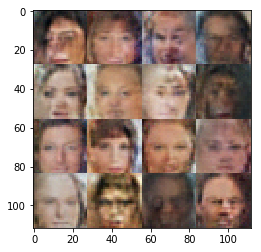

Epoch 1/1... Discriminator Loss: 0.0322... Generator Loss: 8.1236
Epoch 1/1... Discriminator Loss: 0.6808... Generator Loss: 5.7263
Epoch 1/1... Discriminator Loss: 0.7781... Generator Loss: 0.7586
Epoch 1/1... Discriminator Loss: 1.1674... Generator Loss: 0.4615
Epoch 1/1... Discriminator Loss: 1.1019... Generator Loss: 0.5098
Epoch 1/1... Discriminator Loss: 0.0821... Generator Loss: 3.7491
Epoch 1/1... Discriminator Loss: 2.2394... Generator Loss: 0.1372
Epoch 1/1... Discriminator Loss: 1.1951... Generator Loss: 0.4475
Epoch 1/1... Discriminator Loss: 0.2643... Generator Loss: 2.6982
Epoch 1/1... Discriminator Loss: 1.2520... Generator Loss: 1.2532


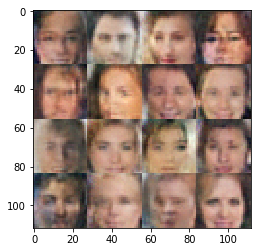

Epoch 1/1... Discriminator Loss: 1.8076... Generator Loss: 0.2592
Epoch 1/1... Discriminator Loss: 1.5749... Generator Loss: 0.3389
Epoch 1/1... Discriminator Loss: 0.6458... Generator Loss: 1.0797
Epoch 1/1... Discriminator Loss: 2.4026... Generator Loss: 0.1227
Epoch 1/1... Discriminator Loss: 1.6088... Generator Loss: 0.2967
Epoch 1/1... Discriminator Loss: 0.4586... Generator Loss: 2.0567
Epoch 1/1... Discriminator Loss: 0.4518... Generator Loss: 1.3443
Epoch 1/1... Discriminator Loss: 0.4735... Generator Loss: 1.2727
Epoch 1/1... Discriminator Loss: 2.1128... Generator Loss: 0.1579
Epoch 1/1... Discriminator Loss: 0.1203... Generator Loss: 3.7128


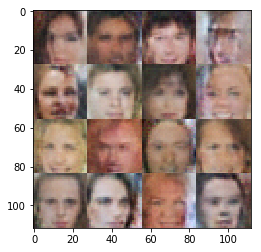

Epoch 1/1... Discriminator Loss: 3.0687... Generator Loss: 0.0666
Epoch 1/1... Discriminator Loss: 0.6716... Generator Loss: 0.8884
Epoch 1/1... Discriminator Loss: 0.7049... Generator Loss: 0.9090
Epoch 1/1... Discriminator Loss: 1.5431... Generator Loss: 0.5866
Epoch 1/1... Discriminator Loss: 1.3509... Generator Loss: 0.4774
Epoch 1/1... Discriminator Loss: 1.6111... Generator Loss: 0.3100
Epoch 1/1... Discriminator Loss: 1.2368... Generator Loss: 0.4510
Epoch 1/1... Discriminator Loss: 1.6575... Generator Loss: 0.2996
Epoch 1/1... Discriminator Loss: 1.7113... Generator Loss: 0.4193
Epoch 1/1... Discriminator Loss: 1.4977... Generator Loss: 0.3851


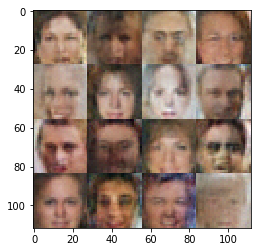

Epoch 1/1... Discriminator Loss: 1.3486... Generator Loss: 0.4161
Epoch 1/1... Discriminator Loss: 1.4845... Generator Loss: 0.4101
Epoch 1/1... Discriminator Loss: 1.5768... Generator Loss: 0.3403
Epoch 1/1... Discriminator Loss: 0.2264... Generator Loss: 3.1585
Epoch 1/1... Discriminator Loss: 0.8049... Generator Loss: 0.9343
Epoch 1/1... Discriminator Loss: 1.5519... Generator Loss: 0.3259
Epoch 1/1... Discriminator Loss: 0.1010... Generator Loss: 5.3210
Epoch 1/1... Discriminator Loss: 1.3549... Generator Loss: 0.4509
Epoch 1/1... Discriminator Loss: 1.6521... Generator Loss: 0.2993
Epoch 1/1... Discriminator Loss: 1.6813... Generator Loss: 0.3063


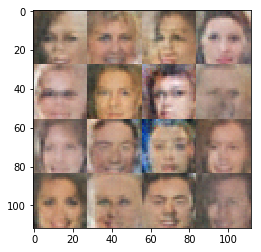

Epoch 1/1... Discriminator Loss: 1.9167... Generator Loss: 0.2053
Epoch 1/1... Discriminator Loss: 1.9515... Generator Loss: 0.2246
Epoch 1/1... Discriminator Loss: 0.5341... Generator Loss: 1.6155
Epoch 1/1... Discriminator Loss: 1.3306... Generator Loss: 0.3948
Epoch 1/1... Discriminator Loss: 1.2876... Generator Loss: 0.4319
Epoch 1/1... Discriminator Loss: 0.0970... Generator Loss: 3.4804
Epoch 1/1... Discriminator Loss: 0.7808... Generator Loss: 0.7622
Epoch 1/1... Discriminator Loss: 0.6983... Generator Loss: 2.1653
Epoch 1/1... Discriminator Loss: 0.2299... Generator Loss: 7.8197
Epoch 1/1... Discriminator Loss: 0.7247... Generator Loss: 1.0072


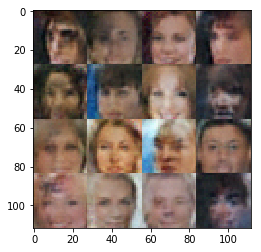

Epoch 1/1... Discriminator Loss: 0.2426... Generator Loss: 4.9140
Epoch 1/1... Discriminator Loss: 0.1525... Generator Loss: 4.0814
Epoch 1/1... Discriminator Loss: 2.0313... Generator Loss: 0.1710
Epoch 1/1... Discriminator Loss: 0.4247... Generator Loss: 1.5743
Epoch 1/1... Discriminator Loss: 0.5128... Generator Loss: 1.4362
Epoch 1/1... Discriminator Loss: 1.3076... Generator Loss: 0.5399
Epoch 1/1... Discriminator Loss: 2.1847... Generator Loss: 0.1589
Epoch 1/1... Discriminator Loss: 2.1875... Generator Loss: 0.1976
Epoch 1/1... Discriminator Loss: 2.1936... Generator Loss: 0.1820
Epoch 1/1... Discriminator Loss: 1.8266... Generator Loss: 0.2423


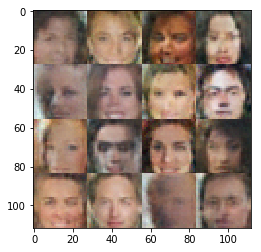

Epoch 1/1... Discriminator Loss: 0.1844... Generator Loss: 5.5920
Epoch 1/1... Discriminator Loss: 1.9349... Generator Loss: 2.3902
Epoch 1/1... Discriminator Loss: 0.9669... Generator Loss: 0.8001
Epoch 1/1... Discriminator Loss: 1.4669... Generator Loss: 0.4257
Epoch 1/1... Discriminator Loss: 1.9076... Generator Loss: 0.2127
Epoch 1/1... Discriminator Loss: 1.7859... Generator Loss: 0.2603
Epoch 1/1... Discriminator Loss: 1.0627... Generator Loss: 0.6248
Epoch 1/1... Discriminator Loss: 1.3087... Generator Loss: 0.4258
Epoch 1/1... Discriminator Loss: 0.6194... Generator Loss: 0.9483
Epoch 1/1... Discriminator Loss: 2.2151... Generator Loss: 0.1448


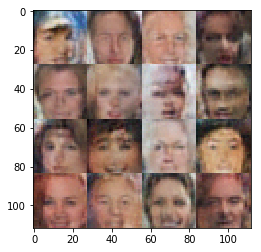

Epoch 1/1... Discriminator Loss: 1.7651... Generator Loss: 0.3208
Epoch 1/1... Discriminator Loss: 1.9036... Generator Loss: 0.2098
Epoch 1/1... Discriminator Loss: 1.0244... Generator Loss: 0.7261
Epoch 1/1... Discriminator Loss: 1.1929... Generator Loss: 0.5468
Epoch 1/1... Discriminator Loss: 2.8443... Generator Loss: 0.1278
Epoch 1/1... Discriminator Loss: 1.8742... Generator Loss: 0.6826
Epoch 1/1... Discriminator Loss: 1.2528... Generator Loss: 0.4415
Epoch 1/1... Discriminator Loss: 0.5491... Generator Loss: 2.1277
Epoch 1/1... Discriminator Loss: 0.8218... Generator Loss: 5.8142
Epoch 1/1... Discriminator Loss: 0.3297... Generator Loss: 4.5054


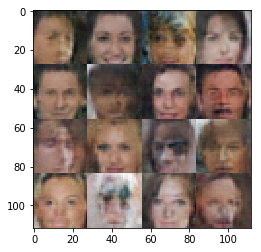

Epoch 1/1... Discriminator Loss: 1.8478... Generator Loss: 0.2422
Epoch 1/1... Discriminator Loss: 2.5096... Generator Loss: 0.1190
Epoch 1/1... Discriminator Loss: 2.2783... Generator Loss: 0.1639
Epoch 1/1... Discriminator Loss: 0.7633... Generator Loss: 0.8740
Epoch 1/1... Discriminator Loss: 1.3580... Generator Loss: 0.6383
Epoch 1/1... Discriminator Loss: 1.7107... Generator Loss: 0.2793
Epoch 1/1... Discriminator Loss: 1.0689... Generator Loss: 0.5777
Epoch 1/1... Discriminator Loss: 2.2458... Generator Loss: 0.1620
Epoch 1/1... Discriminator Loss: 0.1898... Generator Loss: 2.6758
Epoch 1/1... Discriminator Loss: 0.1236... Generator Loss: 3.2680


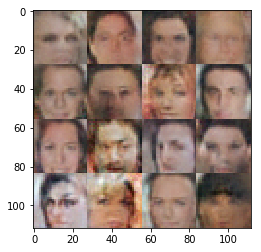

Epoch 1/1... Discriminator Loss: 1.9230... Generator Loss: 0.1903
Epoch 1/1... Discriminator Loss: 1.8404... Generator Loss: 0.2352
Epoch 1/1... Discriminator Loss: 1.3444... Generator Loss: 0.4595
Epoch 1/1... Discriminator Loss: 0.4532... Generator Loss: 4.7238
Epoch 1/1... Discriminator Loss: 2.5604... Generator Loss: 0.1152
Epoch 1/1... Discriminator Loss: 2.8025... Generator Loss: 0.0896
Epoch 1/1... Discriminator Loss: 2.1543... Generator Loss: 0.6260
Epoch 1/1... Discriminator Loss: 1.6046... Generator Loss: 0.3151
Epoch 1/1... Discriminator Loss: 1.3815... Generator Loss: 0.4026
Epoch 1/1... Discriminator Loss: 2.6956... Generator Loss: 0.0958


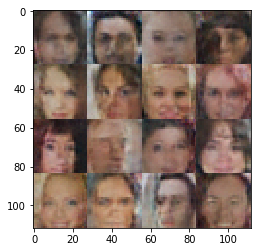

Epoch 1/1... Discriminator Loss: 0.3586... Generator Loss: 1.9458
Epoch 1/1... Discriminator Loss: 0.0927... Generator Loss: 3.5601
Epoch 1/1... Discriminator Loss: 0.1727... Generator Loss: 3.2420
Epoch 1/1... Discriminator Loss: 0.2278... Generator Loss: 2.8478
Epoch 1/1... Discriminator Loss: 0.4282... Generator Loss: 6.8380
Epoch 1/1... Discriminator Loss: 2.1169... Generator Loss: 0.1812
Model Trained


In [ ]:
batch_size = 64
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.